In [28]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Define parameters
batch_size = 16
img_height = 460
img_width = 700
epochs = 20
learning_rate = 0.0001

In [4]:
train_dir = 'Breast_Cancer_DataSet/Train'
validation_dir = 'Breast_Cancer_DataSet/valid'
test_dir = 'Breast_Cancer_DataSet/Test'

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 808 files belonging to 2 classes.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels='inferred',
    label_mode='binary',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 189 files belonging to 2 classes.


In [7]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    seed=42,
    image_size=(img_height, img_width),
)

Found 129 files belonging to 2 classes.


In [8]:
class_names = train_ds.class_names
print("Class Names:", class_names)

Class Names: ['Benign', 'Malignant']


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [12]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    data_augmentation,
    normalization_layer,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 460, 700, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 460, 700, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 458, 698, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 229, 349, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 227, 347, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 113, 173, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 111, 171, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 55, 85, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 598400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │     153,190,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,284,161 (584.73 MB)

 Trainable params: 153,284,161 (584.73 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 446s 8s/step - accuracy: 0.4905 - loss: 1.7154 - val_accuracy: 0.8624 - val_loss: 0.4208
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 476s 9s/step - accuracy: 0.6929 - loss: 0.5805 - val_accuracy: 0.9153 - val_loss: 0.2827
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 416s 8s/step - accuracy: 0.8013 - loss: 0.4864 - val_accuracy: 0.4868 - val_loss: 0.6094
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 416s 8s/step - accuracy: 0.6612 - loss: 0.6044 - val_accuracy: 0.9418 - val_loss: 0.3257
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 431s 8s/step - accuracy: 0.7795 - loss: 0.4718 - val_accuracy: 0.8942 - val_loss: 0.2842
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 407s 8s/step - accuracy: 0.8166 - loss: 0.4509 - val_accuracy: 0.9471 - val_loss: 0.2314
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 450s 9s/step - accuracy: 0.8363 - loss: 0.4268 - val_accuracy: 0.9153 - val_loss: 0.2608
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 452s 9s/step - accuracy: 0.8424 - loss: 0.4042 - val_accuracy: 0.7090 - v

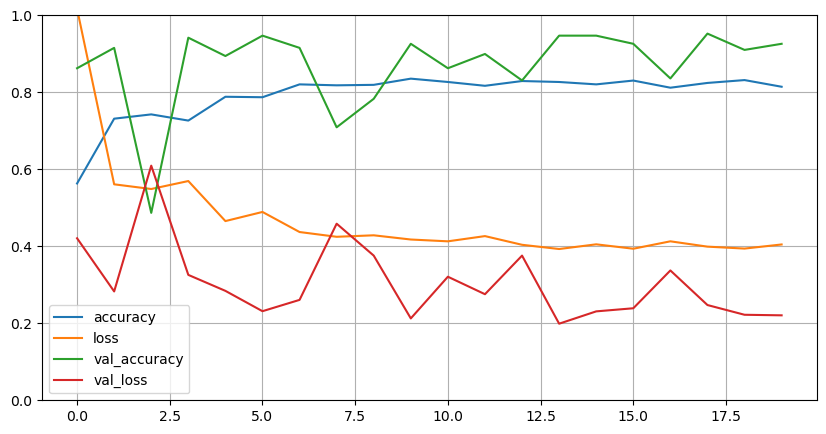

In [35]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8337 - loss: 0.5022
Test Accuracy: 84.50%
Test Loss: 51.43%


In [37]:
model.save('breast_cancer_model.keras')